In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("max_rows", None)
pd.set_option('max_columns', None)

In [3]:
df=pd.read_csv("D:/DataScience/Python/dataset/data.csv")

In [4]:
df.shape

(398, 9)

In [5]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [8]:
df.tail()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024
397,1,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455


In [9]:
## we need to predict vehicle performance,
# dependent variable is Kilometer_per_liter
# rest is our independent variable

In [10]:
df.isna().sum()

## we do not have any missing value

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [11]:
df["horsepower"].value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
70     12
67     12
105    12
65     10
85      9
97      9
80      7
140     7
145     7
92      6
?       6
72      6
78      6
84      6
68      6
115     5
175     5
86      5
170     5
130     5
60      5
180     5
71      5
83      4
76      4
52      4
120     4
165     4
48      3
125     3
63      3
96      3
190     3
74      3
215     3
112     3
225     3
69      3
46      2
58      2
155     2
62      2
87      2
153     2
79      2
198     2
81      2
129     2
139     2
98      2
160     2
53      2
66      1
148     1
107     1
208     1
193     1
220     1
91      1
61      1
167     1
152     1
82      1
49      1
137     1
122     1
149     1
113     1
132     1
138     1
93      1
108     1
158     1
102     1
54      1
116     1
133     1
77      1
103     1
135     1
200     1
210     1
142     1
230     1
64      1
89      1
94      1
Name: horsepower, dtype: int64

In [12]:
#df["horsepower"].replace("?",np.nan,inplace=True)
df["horsepower"]=pd.to_numeric(df["horsepower"], errors='coerce')

In [13]:
df.dropna(inplace=True)

In [14]:
df["horsepower"].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
95.0     14
75.0     14
67.0     12
105.0    12
70.0     12
65.0     10
85.0      9
97.0      9
145.0     7
140.0     7
80.0      7
68.0      6
72.0      6
84.0      6
78.0      6
92.0      6
175.0     5
115.0     5
180.0     5
60.0      5
86.0      5
130.0     5
71.0      5
170.0     5
165.0     4
83.0      4
52.0      4
120.0     4
76.0      4
96.0      3
69.0      3
190.0     3
74.0      3
63.0      3
112.0     3
215.0     3
48.0      3
225.0     3
125.0     3
62.0      2
198.0     2
155.0     2
153.0     2
81.0      2
139.0     2
53.0      2
160.0     2
58.0      2
87.0      2
46.0      2
129.0     2
98.0      2
79.0      2
210.0     1
200.0     1
113.0     1
220.0     1
193.0     1
82.0      1
54.0      1
102.0     1
64.0      1
132.0     1
77.0      1
142.0     1
135.0     1
138.0     1
133.0     1
103.0     1
66.0      1
89.0      1
149.0     1
108.0     1
152.0     1
208.0     1
148.0     1
93.0      1
61.0      1
122.

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

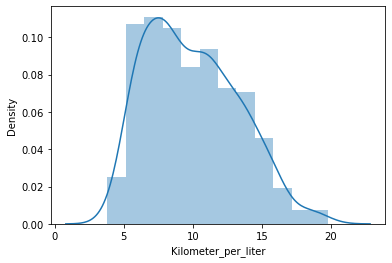

In [16]:
sns.distplot(df["Kilometer_per_liter"])

<AxesSubplot:>

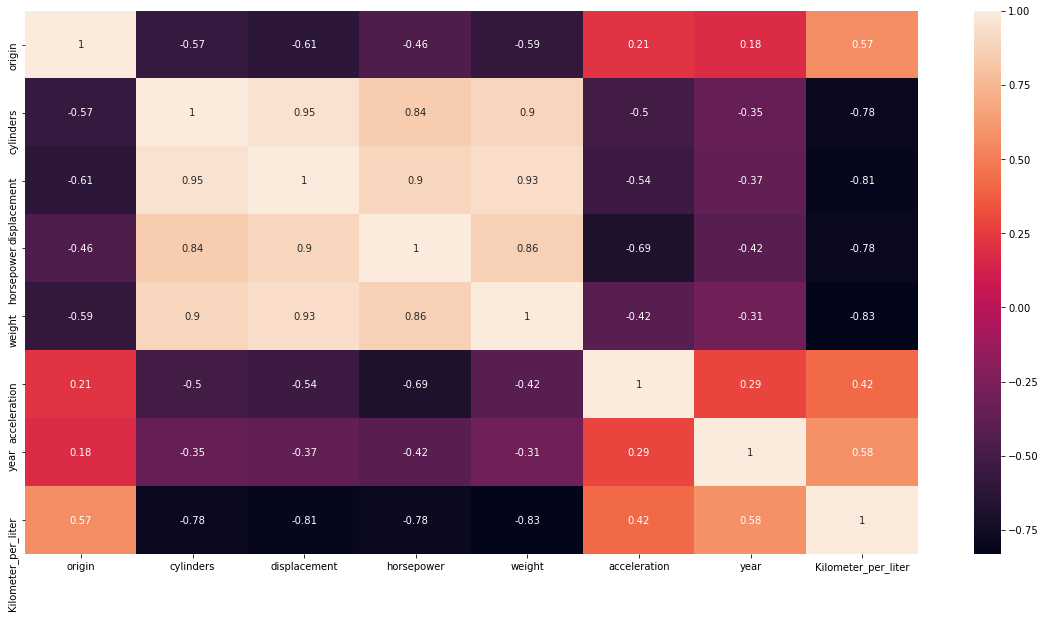

In [17]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot=True)

## here we can see almost every property is cprrelated to kilometer_per_liter

In [18]:
df.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.576531,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,0.805518,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,1.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,2.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


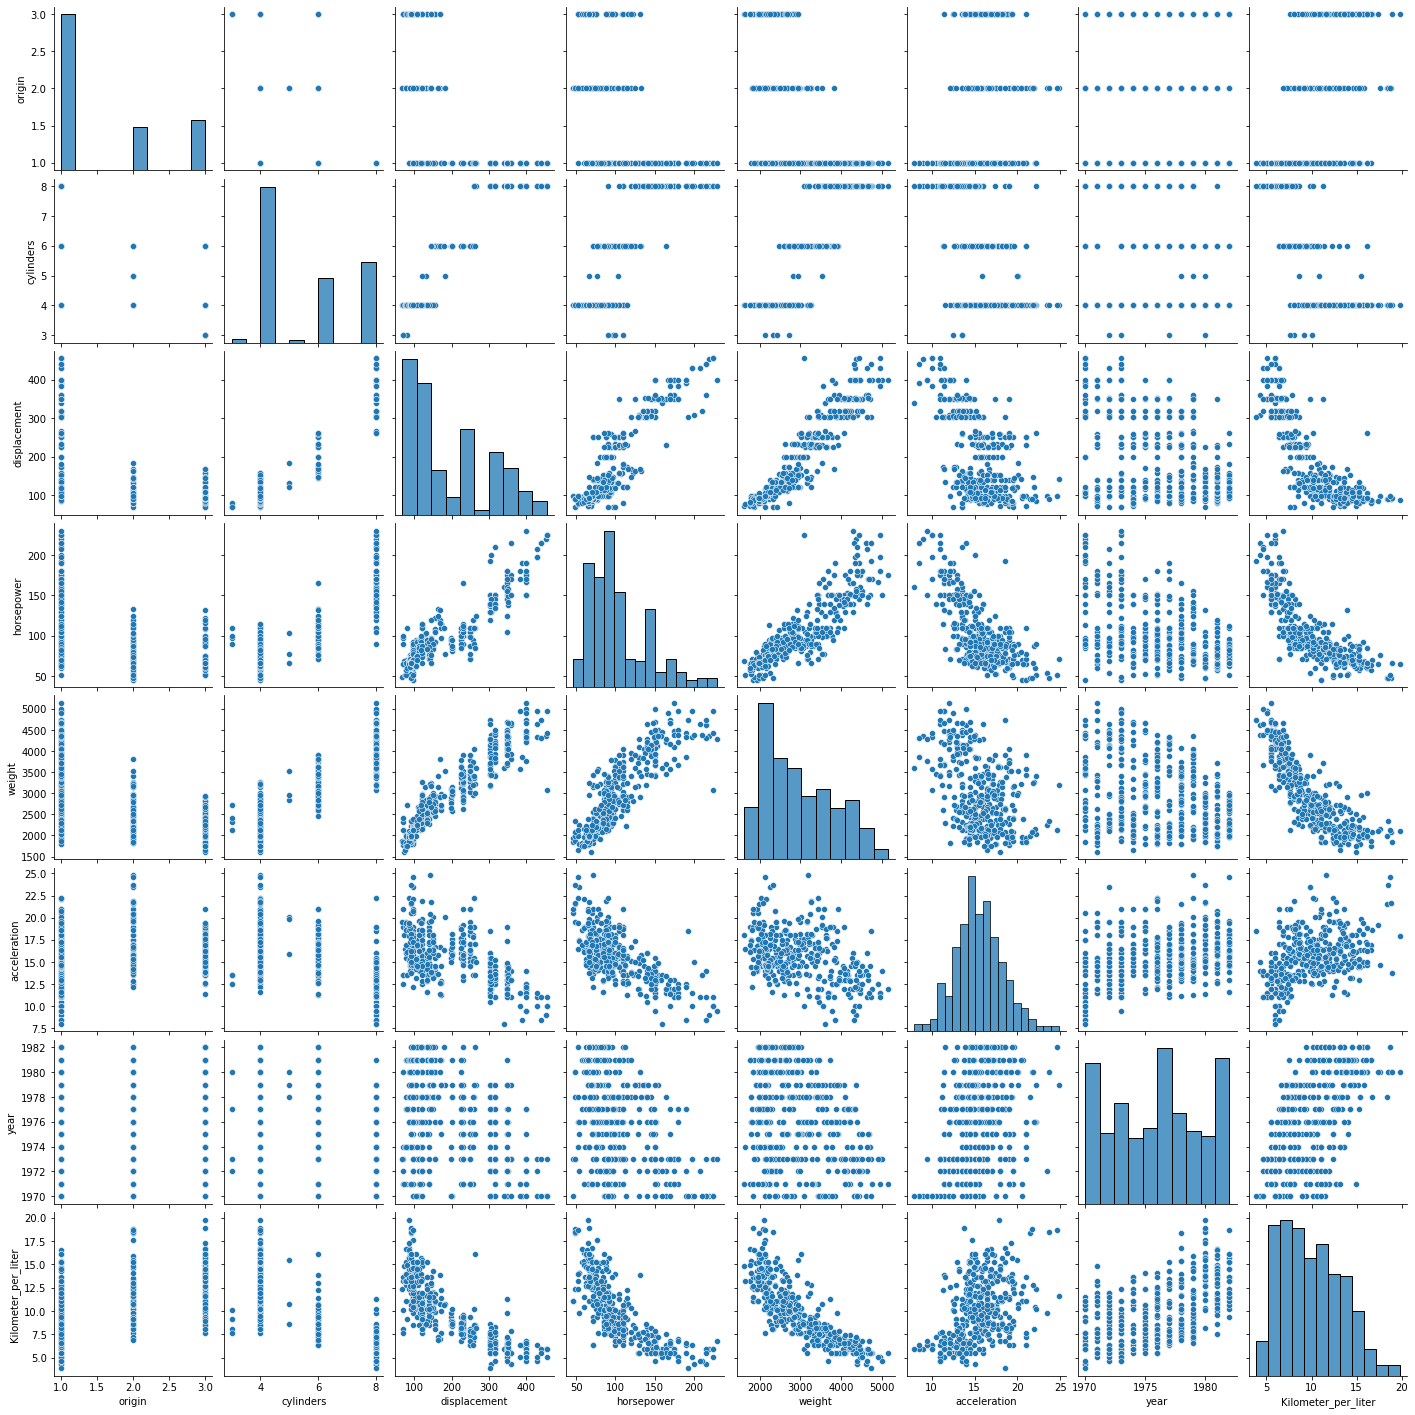

In [19]:
sns.pairplot(df)

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer_per_liter'>

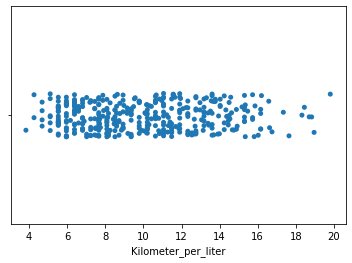

In [20]:
sns.stripplot(df["Kilometer_per_liter"])

## most of the vehicle are from country 1

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders', ylabel='count'>

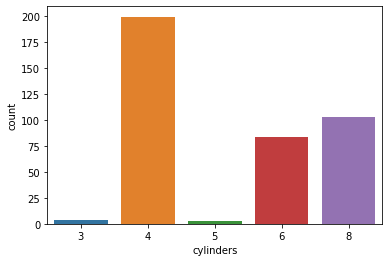

In [21]:
sns.countplot(df["cylinders"])

<AxesSubplot:xlabel='count', ylabel='origin'>

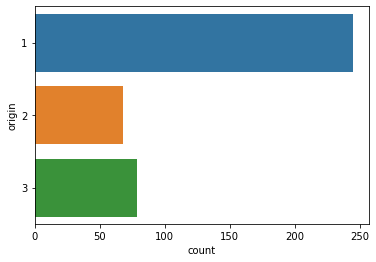

In [22]:
sns.countplot(y=df["origin"])

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='cylinders'>

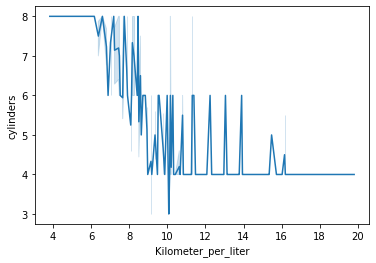

In [23]:
sns.lineplot(x=df["Kilometer_per_liter"],y=df["cylinders"])

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='displacement'>

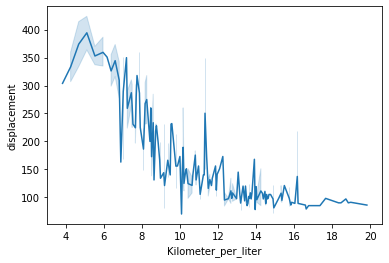

In [24]:
sns.lineplot(x=df["Kilometer_per_liter"],y=df["displacement"])

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='acceleration'>

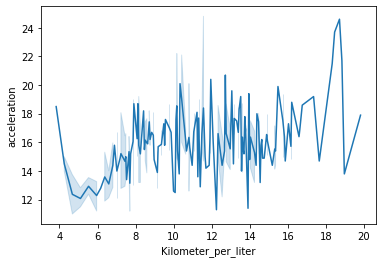

In [25]:
sns.lineplot(x=df["Kilometer_per_liter"],y=df["acceleration"])

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='year'>

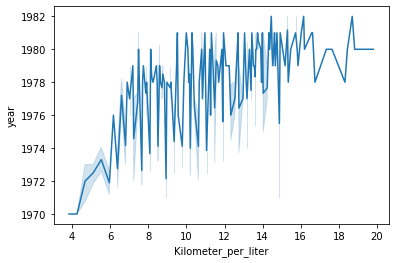

In [26]:
sns.lineplot(x=df["Kilometer_per_liter"],y=df["year"])

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer_per_liter'>

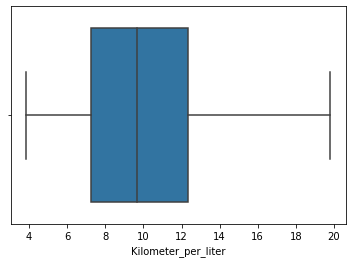

In [27]:
sns.boxplot(df["Kilometer_per_liter"])

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["name"]=le.fit_transform(df["name"])

In [29]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,48,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,35,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,229,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,13,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,159,7.227443


<AxesSubplot:>

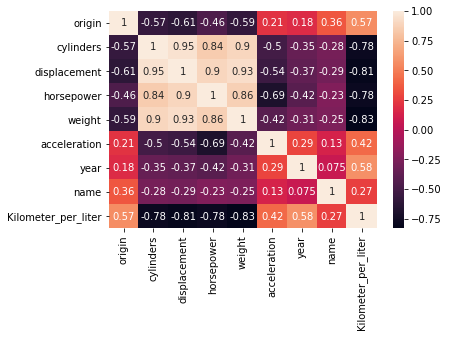

In [30]:
sns.heatmap(df.corr(),annot=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    int32  
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int32(1), int64(4)
memory usage: 39.1 KB


In [32]:
x=df.iloc[:,:8]

In [33]:
y=df.iloc[:,8:]

In [34]:
x

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name
0,1,8,307.0,130.0,3504,12.0,1970,48
1,1,8,350.0,165.0,3693,11.5,1970,35
2,1,8,318.0,150.0,3436,11.0,1970,229
3,1,8,304.0,150.0,3433,12.0,1970,13
4,1,8,302.0,140.0,3449,10.5,1970,159
5,1,8,429.0,198.0,4341,10.0,1970,140
6,1,8,454.0,220.0,4354,9.0,1970,53
7,1,8,440.0,215.0,4312,8.5,1970,221
8,1,8,455.0,225.0,4425,10.0,1970,239
9,1,8,390.0,190.0,3850,8.5,1970,1


In [35]:
y

,Kilometer_per_liter
0,7.652587
1,6.377156
2,7.652587
3,6.802299
4,7.227443
5,6.377156
6,5.952012
7,5.952012
8,5.952012
9,6.377156


In [36]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler().fit_transform(x)
t = StandardScaler().fit_transform(y)

x = pd.DataFrame(s)
y = pd.DataFrame(t)

In [37]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(313, 8)
(313, 1)
(79, 8)
(79, 1)


In [40]:
sgd = SGDRegressor()
sgd.fit(x_train, y_train)

C:\Users\adity\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor()

In [41]:
# The coefficients
print("Coefficients: ", sgd.coef_)
print("Intercept : ",sgd.intercept_)

Coefficients:  [ 0.10170545 -0.08532778 -0.0817354  -0.14789979 -0.388343   -0.02680565
  0.33274787  0.03039161]
Intercept :  [-0.0109504]


In [42]:
y_pred = sgd.predict(x_test)

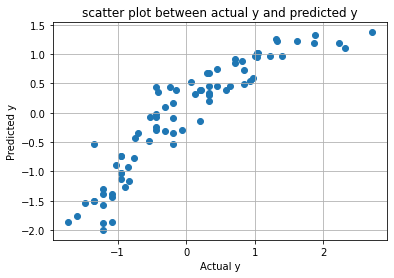

Mean Squared Error : 0.17156664291903473
Mean Absolute Error : 0.30893956519380206


In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred))

In [44]:
r_sq = sgd.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8099310514456415


In [45]:
print('Test Score: ', sgd.score(x_test, y_test))  

Test Score:  0.8322772706774071


C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

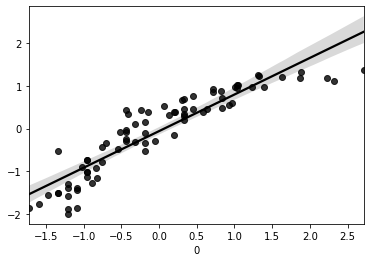

In [46]:
sns.regplot(y_test,y_pred,color='black')